In [1]:
# Let's first create a simple graph
import networkx as nx
import numpy as np
import torch
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv

500 12562


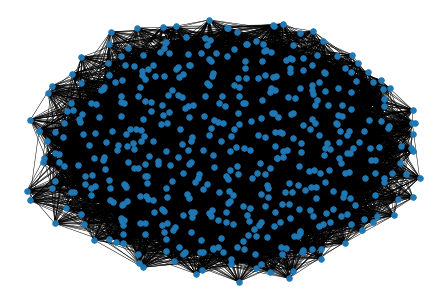

In [2]:
G = nx.erdos_renyi_graph(n=500, p=0.1, seed=0)
nx.draw(G,node_size=30, width=0.5)
print(G.number_of_nodes(), G.number_of_edges())


In [3]:
# Generate random labels and features
# say, we have 5 attribues associate with each node
# it would have been better if we did some basic clustering of the X
# values before we assigned labels.
x_values = np.random.randint(10, size=(G.number_of_nodes(),5))
y_values = list(np.random.randint(2, size=G.number_of_nodes()))
attrs = {}
keys = range(G.number_of_nodes())
for i in keys:
        attrs[i] = {"x": list(x_values[i]), "y": y_values[i]}


In [4]:
# Now we add this info to our random graph
nx.set_node_attributes(G, attrs)


In [5]:
# Let's check a node
G.nodes[1]


{'x': [5, 8, 1, 2, 6], 'y': 0}

In [6]:
# Import torch and PyG
import torch
from torch_geometric.data import Data


In [7]:
# Now, we get the x, y and edge_index values
# Step 1, get X and Y from the graph.
X,Y = [],[]
for n_idx in G.nodes:
    X.append(G.nodes[n_idx]['x'])
    Y.append(G.nodes[n_idx]['y'])

x = torch.tensor(X,dtype=torch.float)
y = torch.tensor(Y,dtype=torch.float)


In [8]:
E = nx.to_edgelist(G)

U, V = [],[]
for edge in list(E):
    U.append(edge[0])
    V.append(edge[1])
edge_index = torch.tensor([U,V], dtype=torch.long)

In [9]:
data = Data(x=x, y=y, edge_index=edge_index)


In [10]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_node_features, 5)
        self.conv2 = GCNConv(5, 2)
        self.lin = nn.Linear(2,1)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)      
        x = self.lin(x)  
        return F.log_softmax(x, dim=1)



In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = data.to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(5000):
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, torch.unsqueeze(data.y,1))
    loss.backward()
    optimizer.step()
    if epoch%100==0:
        print(loss)

tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBac